# Welcome to MAT230, Nonlinear differential equations.
This is the first Jupyter notebook. The idea is to see if everone can get it to work and do a first example.

We need to load a couple of libraries first. lick inside the cell below and hold *shift* and hit *return*.

In [6]:
from sympy import dsolve, Eq, symbols, Function, lambdify,solve, classify_ode
from sympy.plotting import plot
from scipy.integrate import solve_ivp
import numpy as np
from matplotlib import pyplot as plt

## A simple first order example
So now we have the libraries loaded. Let's demonstrate the use of *sympy* on this first order differential equation
$$\frac{d x(t)}{d t} = 1-x(t)$$

In [7]:
t = symbols('t')
x = symbols('x', cls=Function)

deqn1 = Eq(x(t).diff(t), 1-x(t))
deqn1

Eq(Derivative(x(t), t), 1 - x(t))

Lets classify the equation

In [8]:
classify_ode(deqn1, x(t))

('separable',
 '1st_exact',
 '1st_linear',
 'Bernoulli',
 'almost_linear',
 '1st_power_series',
 'lie_group',
 'nth_linear_constant_coeff_undetermined_coefficients',
 'nth_linear_constant_coeff_variation_of_parameters',
 'separable_Integral',
 '1st_exact_Integral',
 '1st_linear_Integral',
 'Bernoulli_Integral',
 'almost_linear_Integral',
 'nth_linear_constant_coeff_variation_of_parameters_Integral')

and solve it

In [10]:
sol1 = dsolve(deqn1, x(t))

sol1

Eq(x(t), C1*exp(-t) + 1)

This is the general solution, the constant $C_1$ will be detemined by the initial conditions 
$$ x(t_0)=X_0.$$

Let's solve the Initial Value Problem (IVP).  

In [11]:
ics={x(0):2}
sol2 = dsolve(deqn1, x(t),ics={x(0):2})

sol2

Eq(x(t), 1 + exp(-t))

We could also use the general solution. 

In [29]:
C1=symbols('C1')
X0=symbols('X0')
C=symbols('C')
C=solve(sol1.subs(t,0).subs(x(0),ics[x(0)]),C1)
print('The solution with initial conditions ', ics, ' we set C= ', C)
sol1.subs(C1,C[0])


The solution with initial conditions  {x(0): 2}  we set C=  [1]


Eq(x(t), 1 + exp(-t))

### Plotting the solution of the initial condition
We use the *lambdify* routine 

In [32]:
f=lambdify(t,sol2.rhs,'numpy')

and we can evaluate the solution at different *t* values. Try to change the number below.

In [34]:
f(1.1)

1.3328710836980795

Now we can create an array of *t*, using *np.linspace(start,end,n)*. 

In [39]:
tval=np.linspace(0,4,100)
tval

array([0.        , 0.04040404, 0.08080808, 0.12121212, 0.16161616,
       0.2020202 , 0.24242424, 0.28282828, 0.32323232, 0.36363636,
       0.4040404 , 0.44444444, 0.48484848, 0.52525253, 0.56565657,
       0.60606061, 0.64646465, 0.68686869, 0.72727273, 0.76767677,
       0.80808081, 0.84848485, 0.88888889, 0.92929293, 0.96969697,
       1.01010101, 1.05050505, 1.09090909, 1.13131313, 1.17171717,
       1.21212121, 1.25252525, 1.29292929, 1.33333333, 1.37373737,
       1.41414141, 1.45454545, 1.49494949, 1.53535354, 1.57575758,
       1.61616162, 1.65656566, 1.6969697 , 1.73737374, 1.77777778,
       1.81818182, 1.85858586, 1.8989899 , 1.93939394, 1.97979798,
       2.02020202, 2.06060606, 2.1010101 , 2.14141414, 2.18181818,
       2.22222222, 2.26262626, 2.3030303 , 2.34343434, 2.38383838,
       2.42424242, 2.46464646, 2.50505051, 2.54545455, 2.58585859,
       2.62626263, 2.66666667, 2.70707071, 2.74747475, 2.78787879,
       2.82828283, 2.86868687, 2.90909091, 2.94949495, 2.98989

and finally, plot the solution.

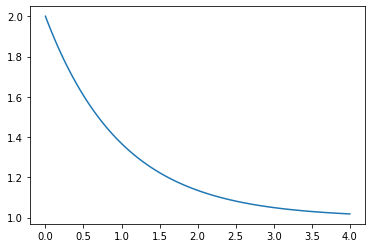

In [41]:
plt.plot(tval,f(tval))

## Numerical solution using *numpy*.

We can use the *lambdify* function to define the rhs of the equation and the  *t* vector from above.


In [87]:
rhs=lambdify([t,x],deqn1.rhs, 'numpy')

rhs

<function _lambdifygenerated(t, x)>

In [78]:
solnum=solve_ivp(rhs,tval,[ics[x(0)]])

TypeError: 'Symbol' object is not callable

In [85]:
deqn1


Eq(Derivative(x(t), t), 1 - x(t))

In [98]:
deqn1.rhs.subs(t,1).subs(x(1),2)

TypeError: 'Symbol' object is not callable

In [100]:
def rhs(y, t, beta, gamma):
    rb = beta * y[0]*y[1]
    rg = gamma * y[1]
    return [- rb , rb - rg, rg]

In [102]:
y, k = symbols('y:3'), symbols('beta gamma')
ydot = rhs(y, None, *k)
y, ydot

((y0, y1, y2), [-beta*y0*y1, beta*y0*y1 - gamma*y1, gamma*y1])